In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import importlib
import utils_threshold
import utils_markov 

# Markov Model

In [94]:
datain = pd.read_csv("datasets/csv6.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

770

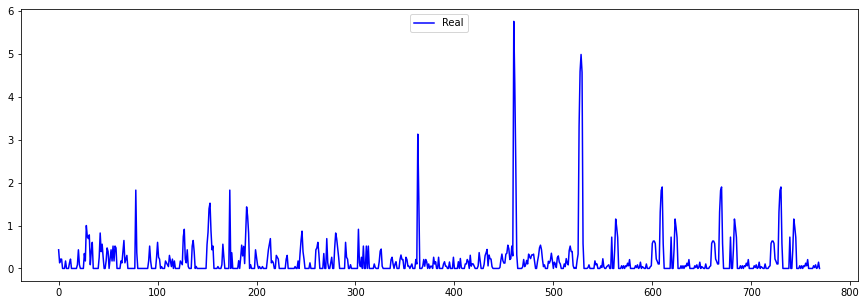

In [97]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc=9)

In [197]:
importlib.reload(utils_threshold)
importlib.reload(utils_markov)

thresholds = np.array([0. , 0.2, 0.5, 1])
order = 1
observed_states, _ = utils_threshold.discretize_thresholds(datalist, thresholds)
markov, states_dict = utils_threshold.avg_markov_from_data(1, datalist, thresholds, noise_mean=0, noise_variance=0)

markov, states_dict

(array([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.8384755 , 0.1107078 , 0.0399274 , 0.01088929],
        [0.        , 0.51666667, 0.3       , 0.13333333, 0.05      ],
        [0.        , 0.37142857, 0.28571429, 0.31428571, 0.02857143],
        [0.        , 0.07142857, 0.07142857, 0.35714286, 0.5       ]]),
 {'0': array([-inf,   0.]),
  '1': array([0. , 0.2]),
  '2': array([0.2, 0.5]),
  '3': array([0.5, 1. ]),
  '4': array([ 1., inf])})

# Plot

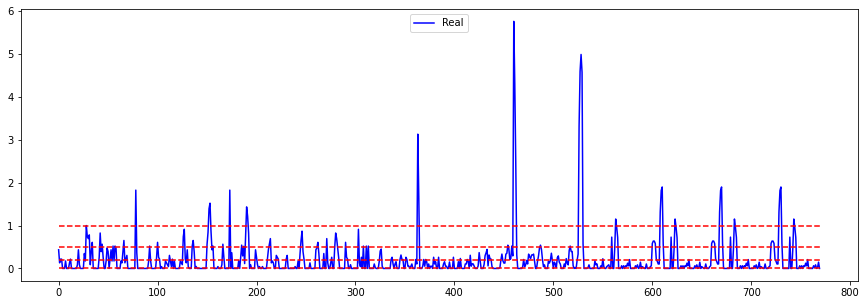

In [198]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc=9)

# plot threshold lines
for thres in thresholds:
    plt.plot(x_axis, thres*np.ones(len(x_axis)), color="r", linestyle='dashed')

# Random walks on Markov Graph

show one random walk in the future + its log-probability (not pure probability to avoid underflow)

In [199]:
states_dict

{'0': array([-inf,   0.]),
 '1': array([0. , 0.2]),
 '2': array([0.2, 0.5]),
 '3': array([0.5, 1. ]),
 '4': array([ 1., inf])}

In [201]:
utils_markov.random_walk_weighted(100, markov, observed_states)

{'log_prob': -75.46401429296955,
 'path': array([1, 4, 4, 4, 4, 4, 4, 4, 3, 1, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)}

# Predict probability at a future point using power of Markov matrix

In [206]:
# transition from last state to state i
n_ahead = n_ahead + 1
last_state = observed_states[-1]
print('Last state:', last_state)

ahead_markov = np.linalg.matrix_power(markov, n_ahead)
pprint(states_dict)
print('At the %d-th point in the future:' % n_ahead)
for state in states_dict.keys():
    i = int(state)
    print('probability -> state %d: %f' %(i, ahead_markov[last_state][i]))

Last state: 1
{'0': array([-inf,   0.]),
 '1': array([0. , 0.2]),
 '2': array([0.2, 0.5]),
 '3': array([0.5, 1. ]),
 '4': array([ 1., inf])}
At the 34-th point in the future:
probability -> state 0: 0.000000
probability -> state 1: 0.718580
probability -> state 2: 0.154391
probability -> state 3: 0.090755
probability -> state 4: 0.036275
